In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
alexnet_img_size = (227,227,3)

In [5]:
no_of_images = 2000

In [6]:
x_train = x_train[:no_of_images]
y_train = y_train[:no_of_images]
x_test = x_test[:int(no_of_images/2)]
y_test = y_test[:int(no_of_images/2)]

In [7]:
# Shape of Dataset
test_shape = np.shape(x_test)
train_shape = np.shape(x_train)


In [8]:
def resize_images(images,img_size):
    resized_images = []
    
    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img,(img_size),mode = 'constant'))
    
    return np.array(resized_images,dtype='float32')

In [13]:
from tqdm import tqdm
import cv2
from skimage.transform import resize

print('Loading train data for AlexNet :')
alex_train = resize_images(x_train,alexnet_img_size)

print('Loading test data for AlexNet :')
alex_test = resize_images(x_test,alexnet_img_size)

Loading train data for AlexNet :


100%|██████████| 2000/2000 [00:20<00:00, 95.86it/s]


Loading test data for AlexNet :


100%|██████████| 1000/1000 [00:09<00:00, 101.13it/s]


In [15]:
from sklearn.utils import shuffle
alex_train, alex_train_labels = shuffle(alex_train, y_train, random_state=10)

In [16]:
alex_val, alex_val_labels = alex_train[:int(no_of_images/5)], alex_train_labels[:int(no_of_images/5)]

In [17]:
x_train, y_train = alex_train, alex_train_labels
x_test, y_test = alex_val, alex_val_labels

In [23]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), input_shape=(alexnet_img_size)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 128)       46592     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 55, 55, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)     

In [24]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)

In [29]:
history=model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_data=(x_test,y_test),
    validation_freq=1
)

Epoch 1/5
63/63 [==============================] - 228s 4s/step - loss: 0.3344 - accuracy: 0.8965 - val_loss: 0.1400 - val_accuracy: 0.9625
Epoch 2/5
63/63 [==============================] - 227s 4s/step - loss: 0.3047 - accuracy: 0.9110 - val_loss: 0.1233 - val_accuracy: 0.9800
Epoch 3/5
63/63 [==============================] - 227s 4s/step - loss: 0.2966 - accuracy: 0.9175 - val_loss: 0.1119 - val_accuracy: 0.9775
Epoch 4/5
63/63 [==============================] - 226s 4s/step - loss: 0.2559 - accuracy: 0.9280 - val_loss: 0.1072 - val_accuracy: 0.9725
Epoch 5/5
63/63 [==============================] - 227s 4s/step - loss: 0.2412 - accuracy: 0.9320 - val_loss: 0.0979 - val_accuracy: 0.9775


In [ ]:
# base model accuracy
# batch_size = 64
# epochs = 1
# model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

In [56]:
# Test baseline accuracy
import tempfile

_, baseline_model_accuracy = model.evaluate(x_test,y_test, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)


Baseline test accuracy: 0.8050000071525574


In [57]:
# base model saved location
_, keras_file = tempfile.mkstemp('.h5')
print('Saving model to: ', keras_file)
tf.keras.models.save_model(model, keras_file, include_optimizer=False)

Saving model to:  /tmp/tmp_gzyhf0f.h5


In [ ]:
###############################
########### PRUNING ###########
###############################

In [32]:
pip install tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 238 kB 5.0 MB/s 


In [87]:
## Prunning the entire dataset

import tensorflow_model_optimization as tfmot
import numpy as np

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# batch_size & epochs stay the same as the baseline model
batch_size = 64
epochs = 1


# Define model for pruning.
# For the pruning schedule, we start at the sparsity level 50% 
# and gradually train the model to reach 90% sparsity. 
# 90% of the weight tensor is going to be pruned away.

x = 0.2
sparsity = []
acc = []
while x <= 0.9:
  print("current x is: ",x)
  sparsity.append(x)
  pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(x, begin_step=0, frequency=100)
  }
  callbacks = [
      tfmot.sparsity.keras.UpdatePruningStep()
    ]

  model_for_pruning = prune_low_magnitude(model, **pruning_params)

  # `prune_low_magnitude` requires a recompile.
  model_for_pruning.compile(optimizer='adam',
                            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                            metrics=['accuracy'])

  history_pruned = model_for_pruning.fit(x_train,y_train,
                      batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),
                      callbacks=callbacks)
    
  _, model_for_pruning_accuracy = model_for_pruning.evaluate(x_test,y_test, verbose=0)

  print("current x is: ",x, "and model acc is: ",model_for_pruning_accuracy)
  acc.append(model_for_pruning_accuracy)
  print("sparsity: ", sparsity)
  print("accuracy list: ", acc)
  x += 0.1

# model_for_pruning.summary()

current x is:  0.2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 234s 7s/step - loss: 0.0797 - accuracy: 0.9775 - val_loss: 0.1333 - val_accuracy: 0.9650
current x is:  0.2 and model acc is:  0.9649999737739563
sparsity:  [0.2]
accuracy list:  [0.9649999737739563]
current x is:  0.30000000000000004
32/32 [==============================] - 234s 7s/step - loss: 0.0998 - accuracy: 0.9715 - val_loss: 0.0982 - val_accuracy: 0.9700
current x is:  0.30000000000000004 and model acc is:  0.9700000286102295
sparsity:  [0.2, 0.30000000000000004]
accuracy list:  [0.9649999737739563, 0.9700000286102295]
current x is:  0.4
32/32 [==============================] - 234s 7s/step - loss: 0.1229 - accuracy: 0.9700 - val_loss: 0.1372 - val_accuracy: 0.9700
current x is:  0.4 and model acc is:  0.9700000286102295
sparsity:  [0.2, 0.30000000000000004, 0.4]
accuracy list:  [0.9649999737739563, 0.9700000286102295, 0.9700000286102295]
current x is:  0.5
32/32 [==============================] - 236s 7s/step - loss: 0.0886 - accuracy: 

In [88]:
sparsity = [round(x, 2) for x in sparsity]
sparsity

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [89]:
acc

[0.9649999737739563,
 0.9700000286102295,
 0.9700000286102295,
 0.9850000143051147,
 0.9850000143051147,
 0.9900000095367432,
 0.9825000166893005,
 0.9775000214576721]

In [90]:
# # fit the pruned model

# logdir = tempfile.mkdtemp()

# callbacks = [
#   tfmot.sparsity.keras.UpdatePruningStep(),
#   tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
# ]

# history_pruned = model_for_pruning.fit(x_train,y_train,
#                   batch_size=batch_size, epochs=epochs, validation_split=validation_split,
#                   callbacks=callbacks)

In [104]:
# Test out pruned model accuracy
_, model_for_pruning_accuracy = model_for_pruning.evaluate(
   x_train,y_train, verbose=0)

In [105]:
# compare results
print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)

Baseline test accuracy: 0.8050000071525574
Pruned test accuracy: 0.9804999828338623


In [76]:
# Once our pre-trained model achieved desirable accuracy
# we save the model trained model and make it “prunable”
# _, keras_file = tempfile.mkstemp('.h5')
# tf.keras.models.save_model(model_for_pruning, keras_file, include_optimizer=False)
# print('Saved baseline model to:', keras_file)

In [106]:
compression_ratio = [1/x for x in sparsity]
compression_ratio

[5.0,
 3.3333333333333335,
 2.5,
 2.0,
 1.6666666666666667,
 1.4285714285714286,
 1.25,
 1.1111111111111112]

In [107]:
acc

[0.9649999737739563,
 0.9700000286102295,
 0.9700000286102295,
 0.9850000143051147,
 0.9850000143051147,
 0.9900000095367432,
 0.9825000166893005,
 0.9775000214576721]

In [108]:
# pruned model saved
_, pruned_keras_file = tempfile.mkstemp('.h5')
print('Saving model to: ', pruned_keras_file)
tf.keras.models.save_model(model_for_pruning, pruned_keras_file, include_optimizer=False)

Saving model to:  /tmp/tmpcy9rwkdb.h5


In [109]:
###############################
###### PRUNING RESULT #########
###############################

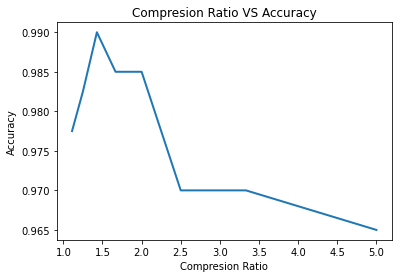

In [110]:
# compression ratio vs accuracy graph
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# plt.scatter(compression_rat, acc)
ax.plot(compression_ratio, acc, linewidth=2.0)
plt.xlabel('Compresion Ratio')
plt.ylabel('Accuracy')
plt.title('Compresion Ratio VS Accuracy')
plt.show()

In [111]:
# accuracy results
print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy (90% pruned rate):', model_for_pruning_accuracy)

Baseline test accuracy: 0.8050000071525574
Pruned test accuracy (90% pruned rate): 0.9804999828338623


In [112]:
# pruned model summary
# model_for_pruning.summary()

In [113]:
# base model summary
# model.summary()

In [114]:
# helper function to get model size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [116]:
# compare model size
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))

Size of gzipped baseline Keras model: 13237833.00 bytes
Size of gzipped pruned Keras model: 5167134.00 bytes


In [117]:
# confusion matrix for based model
# from sklearn.metrics import confusion_matrix
# import numpy as np
# test_predictions = model.predict(x_test)
# confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
# confusion

In [118]:
# confusion matrix for pruned model
# p_test_predictions = model_for_pruning.predict(x_test)
# p_confusion = confusion_matrix(y_test, np.argmax(p_test_predictions,axis=1))
# p_confusion

In [119]:
###############################
######## Quantization #########
###############################

In [120]:
## Quantization 
import tensorflow_model_optimization as tfmot

model_quant = tfmot.quantization.keras.quantize_model(model)
model_quant.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model_quant.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 227, 227, 3)      3         
 er)                                                             
                                                                 
 quant_conv2d_5 (QuantizeWra  (None, 55, 55, 128)      46849     
 pperV2)                                                         
                                                                 
 quant_batch_normalization_5  (None, 55, 55, 128)      513       
  (QuantizeWrapperV2)                                            
                                                                 
 quant_activation_5 (Quantiz  (None, 55, 55, 128)      3         
 eWrapperV2)                                                     
                                                                 
 quant_max_pooling2d_3 (Quan  (None, 27, 27, 128)     

In [121]:
model_quant.fit(x_train,y_train, batch_size=64, epochs=1, validation_data=(x_test,y_test))

32/32 [==============================] - 242s 7s/step - loss: 0.0847 - accuracy: 0.9830 - val_loss: 0.0631 - val_accuracy: 0.9775


In [122]:
# quant model saved
converter = tf.lite.TFLiteConverter.from_keras_model(model_quant)
quant_tflite_model = converter.convert()

_, quant_tflite_file = tempfile.mkstemp('.h5')

with open(quant_tflite_file, 'wb') as f:
  f.write(quant_tflite_model)

print('Saved pruned TFLite model to:', quant_tflite_file)


Saved pruned TFLite model to: /tmp/tmpvdc49azb.h5


In [123]:
#####################################
######## Quantization Result#########
#####################################

In [124]:
# Accuracy comparisons
_, model_quant_accuracy = model_quant.evaluate(x_test,y_test, verbose=0)
print('Baseline test accuracy:', baseline_model_accuracy) 
print('Quantization test accuracy:', model_quant_accuracy)

Baseline test accuracy: 0.8050000071525574
Quantization test accuracy: 0.9775000214576721


In [126]:
# compare model size
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(quant_tflite_file)))
print("Size of gzipped quantization Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))

Size of gzipped baseline Keras model: 11572728.00 bytes
Size of gzipped quantization Keras model: 5167134.00 bytes


In [127]:
#########################################
######## Pruning + Quantization #########
#########################################

In [128]:
## Prunning the entire dataset

import tensorflow_model_optimization as tfmot
import numpy as np

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# batch_size & epochs stay the same as the baseline model
batch_size = 64
epochs = 1


# Define model for pruning.
# For the pruning schedule, we start at the sparsity level 50% 
# and gradually train the model to reach 90% sparsity. 
# 90% of the weight tensor is going to be pruned away.

x = 0.2
sparsity_pq = []
acc_pq = []
while x <= 0.9:
  print("current x is: ",x)
  sparsity_pq.append(x)
  pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(x, begin_step=0, frequency=100)
  }
  callbacks = [
      tfmot.sparsity.keras.UpdatePruningStep()
    ]

  model_for_pruning = prune_low_magnitude(model, **pruning_params)

  # `prune_low_magnitude` requires a recompile.
  model_for_pruning.compile(optimizer='adam',
                            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                            metrics=['accuracy'])

  history_pruned = model_for_pruning.fit(x_train,y_train,
                      batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),
                      callbacks=callbacks)

                      
  model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)
  model_quant_prune = tfmot.quantization.keras.quantize_model(model_for_export)
  model_quant_prune.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
  model_quant_prune.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test))
    
  _, model_quant_prune_accuracy = model_quant_prune.evaluate(x_test,y_test, verbose=0)

  print("current x is: ",x, "and model acc is: ",model_quant_prune_accuracy)
  acc_pq.append(model_quant_prune_accuracy)
  print("sparsity: ", sparsity_pq)
  print("accuracy list: ", acc_pq)
  x += 0.1

# model_for_pruning.summary()

current x is:  0.2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 243s 8s/step - loss: 0.1207 - accuracy: 0.9730 - val_loss: 0.0599 - val_accuracy: 0.9900
current x is:  0.2 and model acc is:  0.9900000095367432
sparsity:  [0.2]
accuracy list:  [0.9900000095367432]
current x is:  0.30000000000000004
32/32 [==============================] - 244s 8s/step - loss: 0.1675 - accuracy: 0.9580 - val_loss: 0.0864 - val_accuracy: 0.9775
current x is:  0.30000000000000004 and model acc is:  0.9775000214576721
sparsity:  [0.2, 0.30000000000000004]
accuracy list:  [0.9900000095367432, 0.9775000214576721]
current x is:  0.4
32/32 [==============================] - 241s 7s/step - loss: 0.1805 - accuracy: 0.9600 - val_loss: 0.0646 - val_accuracy: 0.9850
current x is:  0.4 and model acc is:  0.9850000143051147
sparsity:  [0.2, 0.30000000000000004, 0.4]
accuracy list:  [0.9900000095367432, 0.9775000214576721, 0.9850000143051147]
current x is:  0.5
32/32 [==============================] - 241s 7s/step - loss: 0.1955 - accuracy: 

In [129]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')
with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

In [130]:
#########################################
##### Pruning + Quantization Result #####
#########################################

In [131]:
compression_pq_ratio = [1/x for x in sparsity_pq]
compression_pq_ratio

[5.0,
 3.333333333333333,
 2.5,
 2.0,
 1.6666666666666667,
 1.4285714285714286,
 1.25,
 1.1111111111111112]

In [132]:
acc_pq

[0.9900000095367432,
 0.9775000214576721,
 0.9850000143051147,
 1.0,
 0.9825000166893005,
 0.9950000047683716,
 0.9950000047683716,
 1.0]

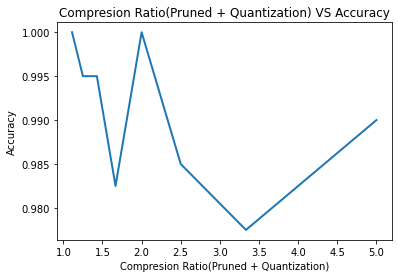

In [133]:
# compression ratio vs accuracy graph
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# plt.scatter(compression_rat, acc)
ax.plot(compression_pq_ratio, acc_pq, linewidth=2.0)
plt.xlabel('Compresion Ratio(Pruned + Quantization)')
plt.ylabel('Accuracy')
plt.title('Compresion Ratio(Pruned + Quantization) VS Accuracy')
plt.show()

In [134]:
# accuracy results
print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned + Quantization test accuracy:', model_quant_prune_accuracy)

Baseline test accuracy: 0.8050000071525574
Pruned + Quantization test accuracy: 1.0


In [135]:
# compare model size
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

Size of gzipped baseline Keras model: 5167134.00 bytes
Size of gzipped pruned and quantized TFlite model: 2754853.00 bytes


In [136]:
# confusion matrix for based model
# from sklearn.metrics import confusion_matrix
# import numpy as np
# test_predictions = model.predict(x_test)
# confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
# confusion

In [ ]:
# confusion matrix for pruned+quantized model
# pq_test_predictions = model_quant_prune.predict(x_test)
# pq_confusion = confusion_matrix(y_test, np.argmax(pq_test_predictions,axis=1))
# pq_confusion